## Importing Libraries

In [54]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!unzip /content/drive/MyDrive/data.zip

Archive:  /content/drive/MyDrive/data.zip
replace data/Fraud.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/Fraud.csv          y



## Reading data

In [57]:
data = pd.read_csv("data/Fraud.csv")

In [58]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [60]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## Data Cleaning

### Check for duplicates

In [61]:
data.duplicated().sum()

0

### Check for null values

In [62]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [63]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [64]:
(
    data.type
    .str.replace("_","")
    .unique()
)

array(['PAYMENT', 'TRANSFER', 'CASHOUT', 'DEBIT', 'CASHIN'], dtype=object)

In [65]:
data.amount

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [66]:
data.isFraud.unique()

array([0, 1])

In [67]:
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [68]:
def clean_data(df):
  return(
  df
  .assign(
  type = lambda df_: (
  df_
  .type
  .str.replace("_","")
  )
  )
  .drop(columns = ["nameOrig","step","nameDest"])
  )

In [69]:
final = clean_data(data)

In [70]:
final.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASHOUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Train Test Split

In [71]:
X = final.drop(columns = "isFlaggedFraud")
y = final.isFlaggedFraud.copy()

In [72]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4072076, 7) (4072076,)
(1018020, 7) (1018020,)
(1272524, 7) (1272524,)


In [73]:
train = pd.concat([X_train,y_train],axis = 1)

In [74]:
valid = pd.concat([X_val,y_val],axis = 1)

In [75]:
test = pd.concat([X_test,y_test],axis =1 )

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072076 entries, 490394 to 2376232
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 279.6+ MB


In [77]:
train.describe(include = "number")

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4.072076e+06,4.072076e+06,4.072076e+06,4.072076e+06,4.072076e+06,4.072076e+06,4.072076e+06
mean,1.798041e+05,8.319879e+05,8.531611e+05,1.100426e+06,1.224602e+06,1.304249e-03,2.701325e-06
std,6.013680e+05,2.883922e+06,2.919515e+06,3.384632e+06,3.660913e+06,3.609083e-02,1.643569e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.341024e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.493421e+04,1.413600e+04,0.000000e+00,1.329327e+05,2.146643e+05,0.000000e+00,0.000000e+00
75%,2.087723e+05,1.072740e+05,1.441051e+05,9.423644e+05,1.112175e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.731626e+07,4.731626e+07,3.553814e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [78]:
train.describe(include = "O")

,type
count,4072076
unique,5
top,CASHOUT
freq,1432505


## EDA - Exploratory Data analysis

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from IPython.display import display, HTML

### Numerical Data EDA

In [80]:
def display_html(size=3, content="content"):
  display(HTML(f"<h{size}>{content}</h{size}>"))
def num_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  # title
  col = data.loc[:, var].copy()
  display_html(size=2, content=var)

  # quick glance
  display_html(3, "Quick Glance:")
  display(col)

  # meta-data
  display_html(3, "Meta-data:")
  print(f"{'Data Type':15}: {col.dtype}")
  print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
  print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

  # quantiles
  display_html(3, "Percentiles:")
  display(
      col
      .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
      .rename(index=lambda val: f"{val * 100:.0f}")
      .rename("value")
      .rename_axis(index="percentile")
      .to_frame()
  )

  # central tendancy
  display_html(3, "Central Tendancy:")
  display(
      pd
      .Series({"mean": col.mean(),
               "trimmed mean (5%)": stats.trim_mean(col.values, 0.05),
               "trimmed mean (10%)": stats.trim_mean(col.values, 0.1),
               "median": col.median()})
      .rename("value")
      .to_frame()
  )

  # spread
  display_html(3, "Measure of Spread:")
  std = col.std()
  iqr = col.quantile(0.75) - col.quantile(0.25)
  display(
      pd
      .Series({
          "var": col.var(),
          "std": std,
          "IQR": iqr,
          "mad": stats.median_abs_deviation(col.dropna()),
          "coef_variance": std / col.mean()
      })
      .rename("value")
      .to_frame()
  )

  # skewness and kurtosis
  display_html(3, "Skewness and Kurtosis:")
  display(
      pd
      .Series({
          "skewness": col.skew(),
          "kurtosis": col.kurtosis()
      })
      .rename("value")
      .to_frame()
  )

  alpha = 0.05
  # test for normality
  display_html(3, "Hypothesis Testing for Normality:")
  # shapiro-wilk test
  display_html(4, "Shapiro-Wilk Test:")
  sw_test = stats.shapiro(col.dropna().values)
  sw_statistic = sw_test.statistic
  sw_pvalue = sw_test.pvalue
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'p-value':21}: {sw_pvalue}")
  print(f"{'Test Statistic':21}: {sw_statistic}")
  if sw_pvalue < alpha:
    print(f"- Since p-value is less than alpha ({alpha}), we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since p-value is greater than alpha ({alpha}), we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")

  #anderson-darling test
  display_html(4, "Anderson-Darling Test:")
  ad_test = stats.anderson(col.dropna().values, dist="norm")
  ad_statistic = ad_test.statistic
  ad_critical = ad_test.critical_values[2]
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'Critical Value':21}: {ad_critical}")
  print(f"{'Test Statistic':21}: {ad_statistic}")
  if ad_statistic >= ad_critical:
    print(f"- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since the Test-statistic is less than Critical Value, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")


In [81]:
num_summary(train,"amount")

490394      10773.65
393198       8186.47
1090867     87643.39
2223634     10969.25
2758690    220228.61
             ...    
4064948     24171.42
367454     110065.43
5760481    242685.91
3820779    270970.28
2376232    585511.14
Name: amount, Length: 4072076, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 4,072,076 / 4,072,076 rows


,value
percentile,
0,0.000000e+00
5,2.223707e+03
10,4.503100e+03
25,1.341024e+04
50,7.493421e+04
75,2.087723e+05
90,3.654877e+05
95,5.192282e+05
99,1.617082e+06


,value
mean,179804.098451
trimmed mean (5%),119116.789137
trimmed mean (10%),107065.819439
median,74934.210000


,value
var,3.616434e+11
std,6.013680e+05
IQR,1.953620e+05
mad,6.844533e+04
coef_variance,3.344573e+00


,value
skewness,31.260421
kurtosis,1845.514933


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.19146806001663208
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 834641.8004613984
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [82]:
num_summary(train,"oldbalanceOrg")

490394       43447.39
393198           0.00
1090867    2185087.69
2223634      51526.08
2758690       9932.00
              ...    
4064948          0.00
367454         475.00
5760481       7029.00
3820779       2406.00
2376232     585511.14
Name: oldbalanceOrg, Length: 4072076, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 4,072,076 / 4,072,076 rows


,value
percentile,
0,0.000000e+00
5,0.000000e+00
10,0.000000e+00
25,0.000000e+00
50,1.413600e+04
75,1.072740e+05
90,1.812292e+06
95,5.806930e+06
99,1.600066e+07


,value
mean,831987.893287
trimmed mean (5%),284581.079943
trimmed mean (10%),95073.616040
median,14136.000000


,value
var,8.317004e+12
std,2.883922e+06
IQR,1.072740e+05
mad,1.413600e+04
coef_variance,3.466302e+00


,value
skewness,5.257465
kurtosis,33.082234


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.3210451006889343
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1095616.6424517315
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


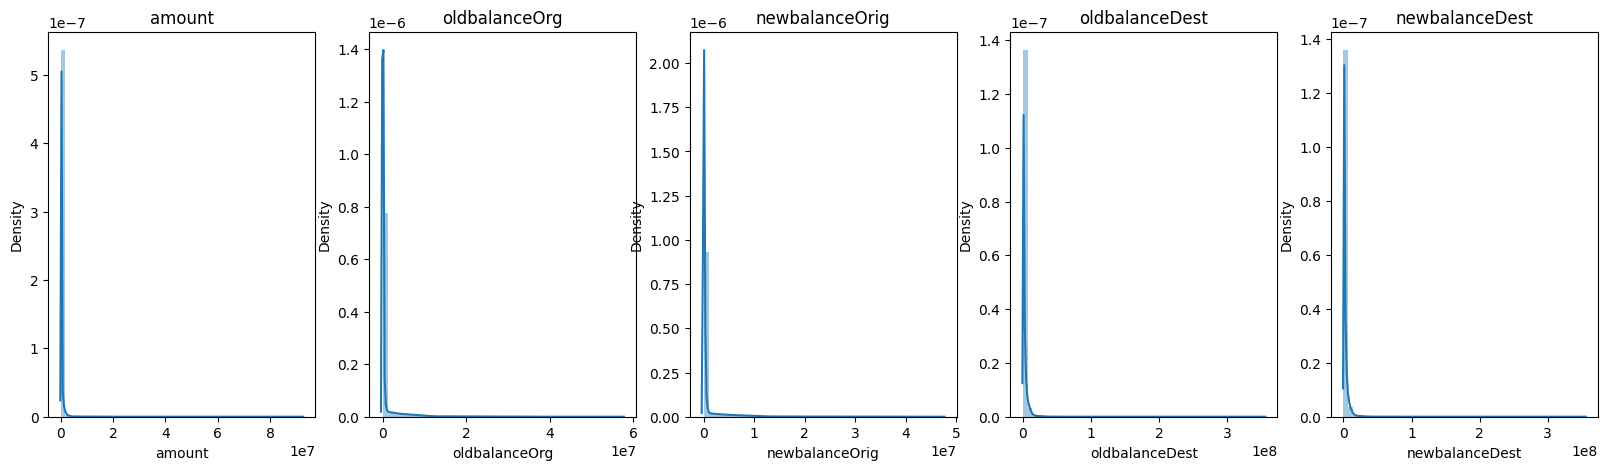

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create box plots for each feature
for i, feature in enumerate(features):
    sns.distplot(train[feature], ax=axes[i])
    axes[i].set_title(feature)

### Categorical Data EDA

In [84]:
def bar_chart(counts, colors, ax):
  barplot = ax.bar(
        x=range(len(counts)),
        height=counts.values,
        tick_label=counts.index,
        color=colors,
        edgecolor="black",
        alpha=0.7
  )

  ax.bar_label(
      barplot,
      padding=5,
      color="black"
  )

  ax.set(
      title="Bar Chart",
      xlabel="Categories",
      ylabel="Count"
  )

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      ha="right"
  )

def pie_chart(counts, colors, ax):
  pie = ax.pie(
        counts.values,
        labels=counts.index,
        autopct="%.2f%%",
        colors=colors,
        wedgeprops=dict(alpha=0.7, edgecolor="black"),
  )

  ax.set_title("Pie Chart")

  ax.legend(
      loc="upper left",
      bbox_to_anchor=(1.02, 1),
      title="Categories",
      title_fontproperties=dict(weight="bold", size=10)
  )

  plt.setp(
      pie[2],
      weight="bold",
      color="white"
  )


In [85]:

def cat_univar_plots(data,
                     var,
                     k=None,
                     order=None,
                     show_wordcloud=True,
                     figsize=(12, 8.5)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")

  fig = plt.figure(figsize=figsize)
  gs = GridSpec(2, 2, figure=fig)
  ax1 = fig.add_subplot(gs[0, 0]) # bar-chart
  ax2 = fig.add_subplot(gs[0, 1]) # pie-chart


  if k is None:
    counts = (
        data
        .loc[:, var]
        .value_counts()
        .reindex(index=order)
    )
  else:
    temp = get_top_k(
        data,
        var,
        k=k
    )
    counts = (
        temp
        .loc[:, var]
        .value_counts()
    )

  colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]

  # bar-chart
  bar_chart(
      counts,
      colors,
      ax1
  )

  # pie_chart
  pie_chart(
      counts,
      colors,
      ax2
  )

  plt.tight_layout()
  plt.show()

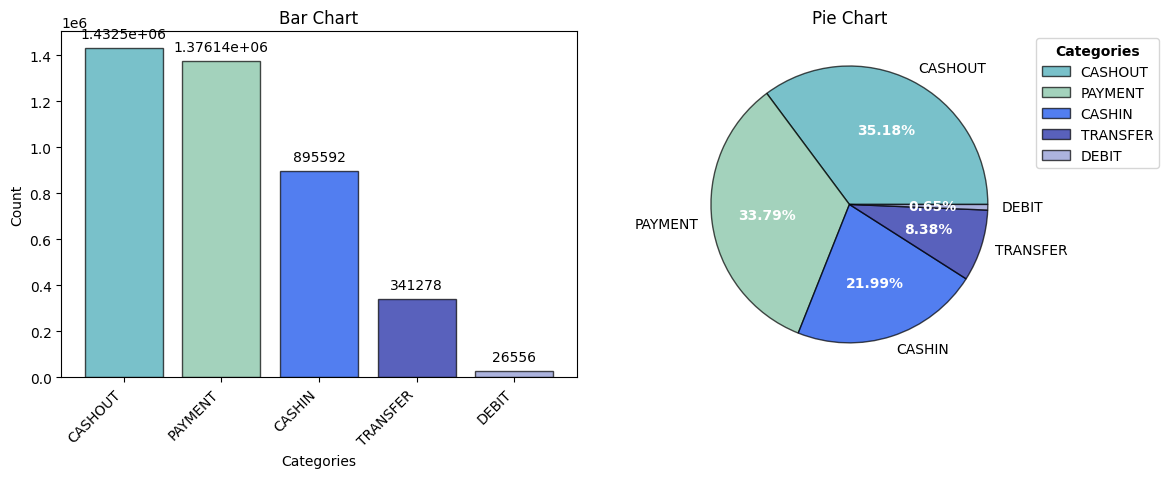

In [86]:
cat_univar_plots(train,"type")

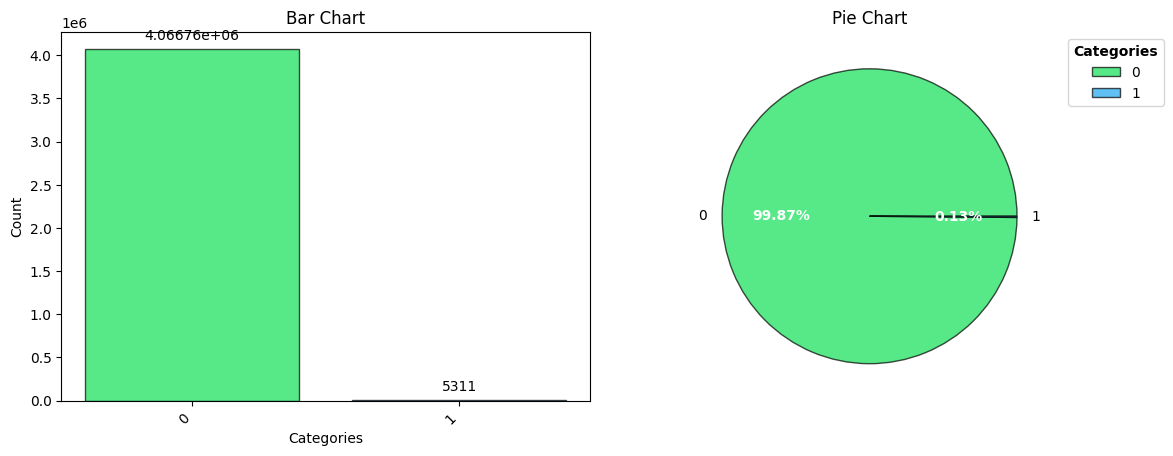

In [87]:
cat_univar_plots(train,"isFraud")

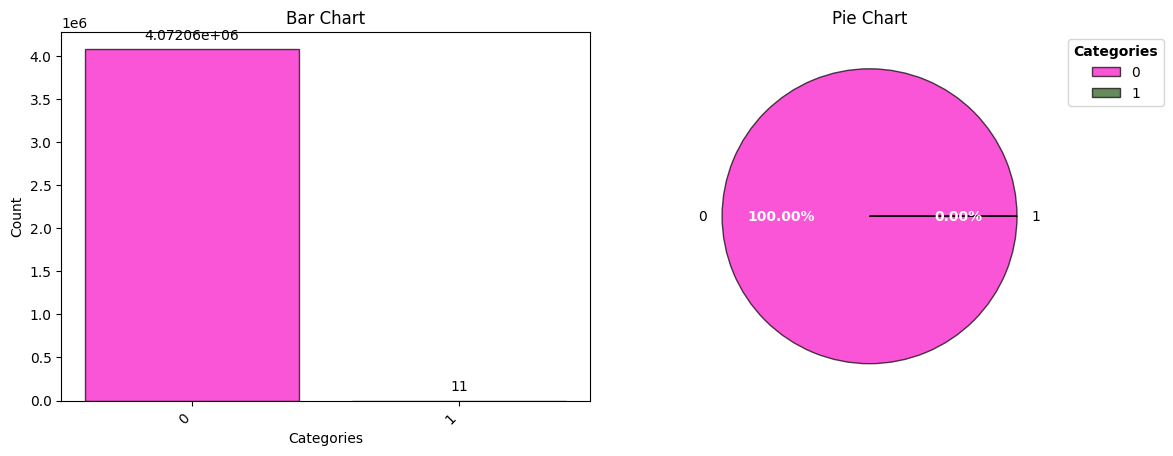

In [88]:
cat_univar_plots(train,"isFlaggedFraud")

## Feature Engineering

### SMOTE for data upscaleing

Original class distribution: Counter({0: 4072065, 1: 11})
Resampled class distribution: Counter({0: 2850443, 1: 2850443})


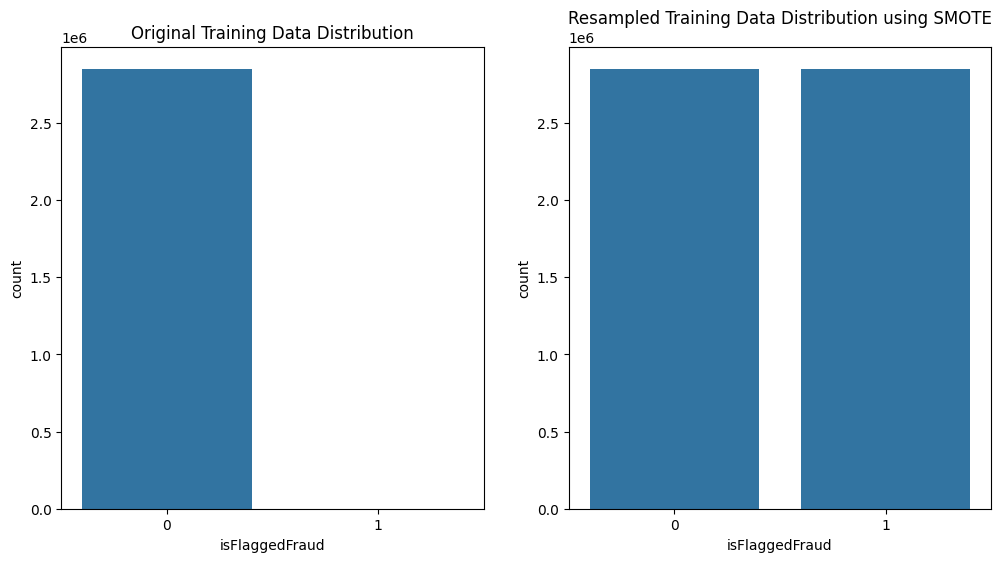

In [89]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

# One-hot encode the 'type' column
data_encoded = pd.get_dummies(train, columns=['type'])

# Separate features and target variable
X = data_encoded.drop(columns=['isFlaggedFraud'])
y = data_encoded['isFlaggedFraud']

# Print the original class distribution
print("Original class distribution:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42, k_neighbors = 1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Plot the original vs resampled data distribution (for visualization)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Original Training Data Distribution')

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title('Resampled Training Data Distribution using SMOTE')

plt.show()


In [90]:
# X_resampled, y_resampled

train_merged = pd.concat([X_resampled, y_resampled], axis = 1)

In [91]:
train_merged

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASHIN,type_CASHOUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud
0,9.836622e+04,2.180000e+02,0.000000e+00,691443.05,740420.33,0,False,True,False,False,False,0
1,1.472546e+05,3.577870e+06,3.725124e+06,2816185.21,2668930.57,0,True,False,False,False,False,0
2,1.129381e+05,2.211717e+06,2.324655e+06,1945938.70,1833000.63,0,True,False,False,False,False,0
3,2.425403e+04,0.000000e+00,0.000000e+00,0.00,0.00,0,False,False,False,True,False,0
4,4.580070e+03,0.000000e+00,0.000000e+00,0.00,0.00,0,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5700881,8.849983e+06,1.884998e+07,1.884998e+07,0.00,0.00,1,False,False,False,False,True,1
5700882,9.376212e+06,1.937621e+07,1.937621e+07,0.00,0.00,1,False,False,False,False,True,1
5700883,6.097433e+05,6.097433e+05,6.097433e+05,0.00,0.00,1,False,False,False,False,True,1
5700884,7.802979e+06,1.780298e+07,1.780298e+07,0.00,0.00,1,False,False,False,False,True,1


### Outlier Treatment

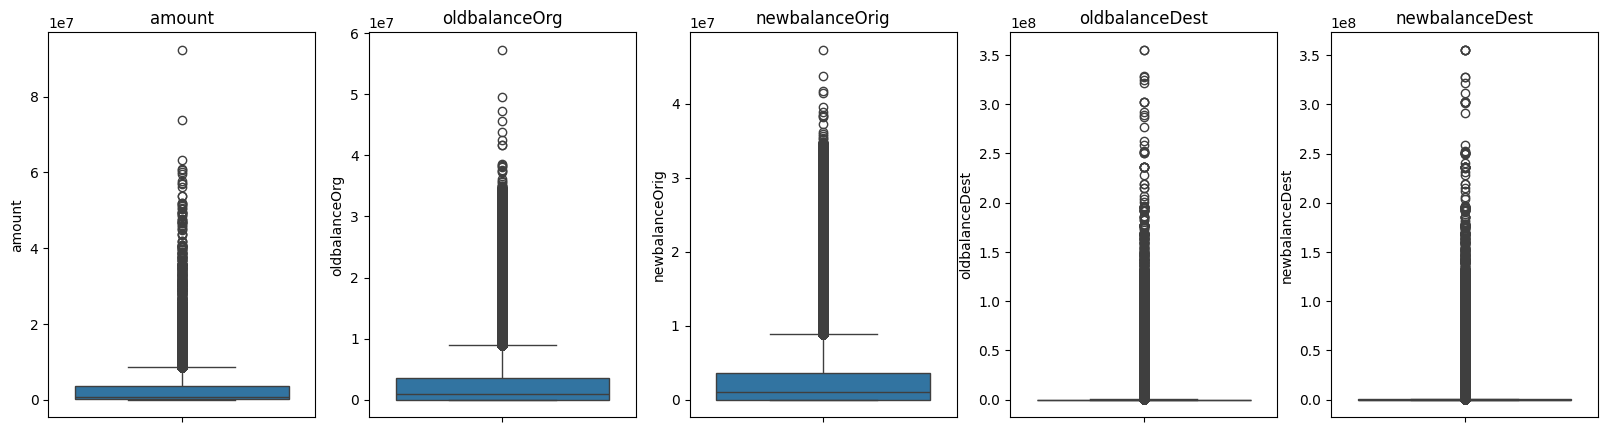

In [92]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=train_merged[feature], ax=axes[i])
    axes[i].set_title(feature)

In [93]:
def treat_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Capping the outliers
            df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return df

In [94]:
treat_outliers_iqr(train_merged)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASHIN,type_CASHOUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud
0,9.836622e+04,2.180000e+02,0.000000e+00,332329.3125,536225.1625,0,False,True,False,False,False,0
1,1.472546e+05,3.577870e+06,3.725124e+06,332329.3125,536225.1625,0,True,False,False,False,False,0
2,1.129381e+05,2.211717e+06,2.324655e+06,332329.3125,536225.1625,0,True,False,False,False,False,0
3,2.425403e+04,0.000000e+00,0.000000e+00,0.0000,0.0000,0,False,False,False,True,False,0
4,4.580070e+03,0.000000e+00,0.000000e+00,0.0000,0.0000,0,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5700881,8.663968e+06,8.876198e+06,8.900819e+06,0.0000,0.0000,1,False,False,False,False,True,1
5700882,8.663968e+06,8.876198e+06,8.900819e+06,0.0000,0.0000,1,False,False,False,False,True,1
5700883,6.097433e+05,6.097433e+05,6.097433e+05,0.0000,0.0000,1,False,False,False,False,True,1
5700884,7.802979e+06,8.876198e+06,8.900819e+06,0.0000,0.0000,1,False,False,False,False,True,1


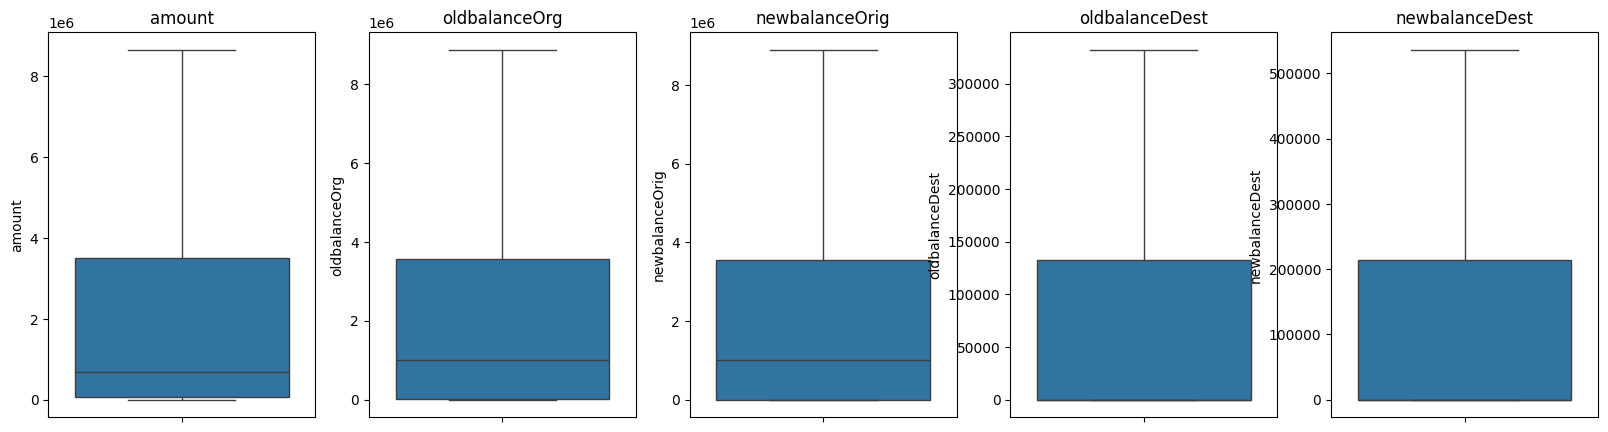

In [95]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=train_merged[feature], ax=axes[i])
    axes[i].set_title(feature)

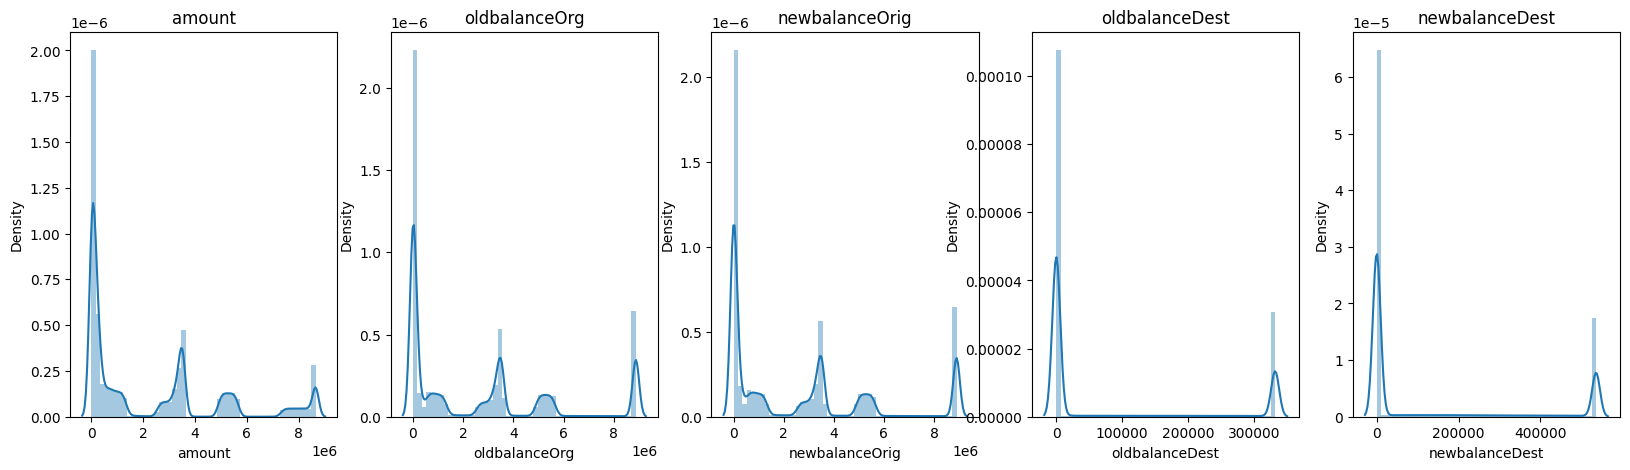

In [96]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create box plots for each feature
for i, feature in enumerate(features):
    sns.distplot(train_merged[feature], ax=axes[i])
    axes[i].set_title(feature)

In [97]:
shuffled_df = train_merged.sample(frac=1).reset_index(drop=True)

In [98]:
shuffled_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASHIN,type_CASHOUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud
0,7.770300e+02,0.000000e+00,0.000000e+00,0.0000,0.0000,0,False,False,False,True,False,0
1,3.470770e+06,3.470770e+06,3.470770e+06,0.0000,0.0000,1,False,False,False,False,True,1
2,2.781878e+05,7.077000e+03,0.000000e+00,332329.3125,536225.1625,0,False,True,False,False,False,0
3,5.061449e+06,5.061449e+06,5.061449e+06,0.0000,0.0000,1,False,False,False,False,True,1
4,7.153332e+04,1.451100e+04,0.000000e+00,332329.3125,536225.1625,0,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5700881,1.033662e+06,1.033662e+06,1.033662e+06,0.0000,0.0000,1,False,False,False,False,True,1
5700882,2.458584e+05,3.075000e+04,2.766084e+05,332329.3125,324930.8400,0,True,False,False,False,False,0
5700883,2.295004e+05,0.000000e+00,0.000000e+00,332329.3125,536225.1625,0,False,True,False,False,False,0
5700884,1.313779e+05,1.966415e+05,6.526362e+04,332329.3125,536225.1625,0,False,True,False,False,False,0


## Pipelining

In [99]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_cols = ['type']

In [100]:
## Numerical Pipeline
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[

    ('ordinalencoder',OrdinalEncoder(categories=[type])),

    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [101]:
X_train = shuffled_df.drop(columns=['isFlaggedFraud'])
y_train = shuffled_df['isFlaggedFraud']

In [102]:
X_train = X_train.iloc[:20000, :]
y_train = y_train.iloc[:20000]

## model Training

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def classification_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier()
}

# Lists to store results
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy, precision, recall, f1 = classification_evaluation(y_test, y_pred)

    # Print results
    print(model_name)
    model_list.append(model_name)

    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print('='*35)
    print('\n')

# Displaying the results in a DataFrame
results_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

print(results_df)


LogisticRegression
Model Training Performance
Accuracy: 0.7879182038976018
Precision: 0.9999981424998402
Recall: 0.7879182038976019
F1 Score: 0.8813798720807303


SVM
Model Training Performance
Accuracy: 0.9994204431318009
Precision: 0.9999983623603564
Recall: 0.9994204431318009
F1 Score: 0.9997093192241487


RandomForest
Model Training Performance
Accuracy: 0.9999754425055848
Precision: 0.9999992078227607
Recall: 0.9999754425055848
F1 Score: 0.9999869536803222


kNN
Model Training Performance
Accuracy: 0.9998321904548294
Precision: 0.9999983626976571
Recall: 0.9998321904548294
F1 Score: 0.9999152696723547


                Model  Accuracy  Precision    Recall  F1 Score
0  LogisticRegression  0.787918   0.999998  0.787918  0.881380
1                 SVM  0.999420   0.999998  0.999420  0.999709
2        RandomForest  0.999975   0.999999  0.999975  0.999987
3                 kNN  0.999832   0.999998  0.999832  0.999915


In [110]:
X_test = shuffled_df.drop(columns=['isFlaggedFraud'])
y_test = shuffled_df['isFlaggedFraud']

X_test = X_test.iloc[30000:35000, :]
y_test = y_test.iloc[30000:35000]


## Hyper Parameter Tuning Using GRID SEARCH CV

In [111]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs', 'saga'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [50, 100, 150]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy, precision, recall, f1 = classification_evaluation(y_test, y_pred)

# Print evaluation results
print("Model Evaluation")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Store results in a DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression (Best Model)'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})

print(results_df)


Best parameters found:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best accuracy score:  0.9798000000000002
Model Evaluation
Accuracy: 0.8982
Precision: 0.9153180046250412
Recall: 0.8982
F1 Score: 0.8970568247751537
                              Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression (Best Model)    0.8982   0.915318  0.8982  0.897057
